In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import plotly.express as px


# Load data

In [46]:
df= pd.read_csv('Mall_Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##  Check duplicated and null values

In [47]:
duplicated_values=df.duplicated().sum()
null_values=df.isnull().sum()
print(f"Duplicated values: {duplicated_values}")
print(f"Null values: {null_values}")

Duplicated values: 0
Null values: CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## Some visualizations to simplify understanding of dataset

### Histograms

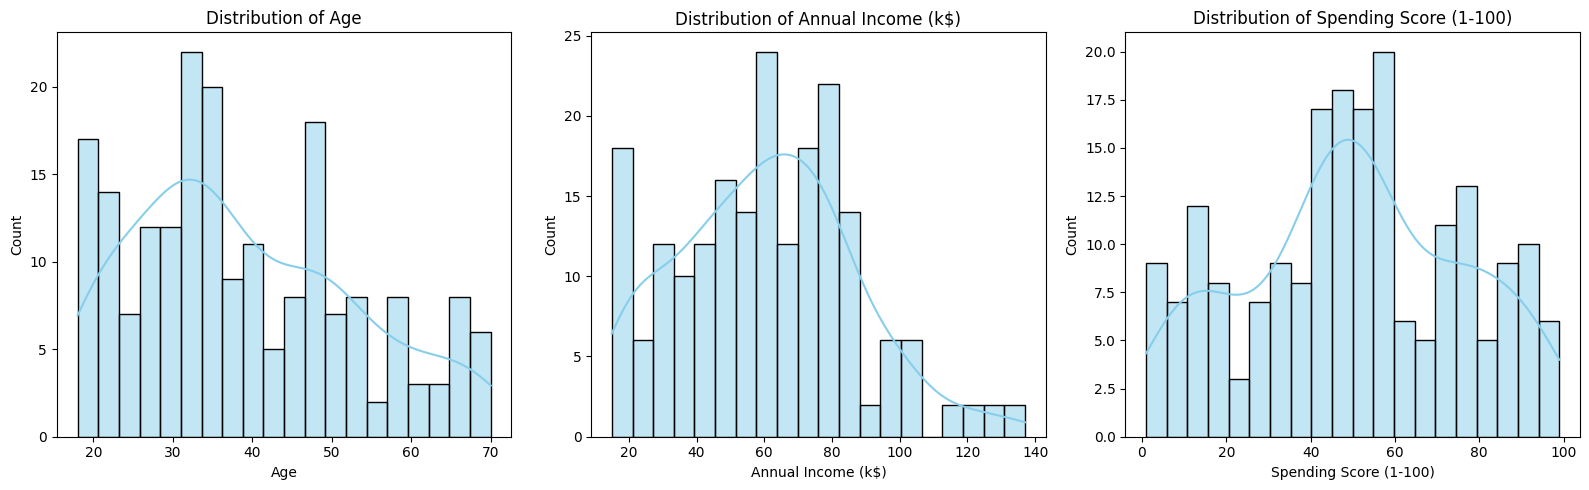

In [48]:
plt.figure(figsize=(16, 5))

num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Boxplots

C:\Users\ELGENDY\AppData\Local\Temp\ipykernel_2100\13862551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette='pastel')
C:\Users\ELGENDY\AppData\Local\Temp\ipykernel_2100\13862551.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='muted')


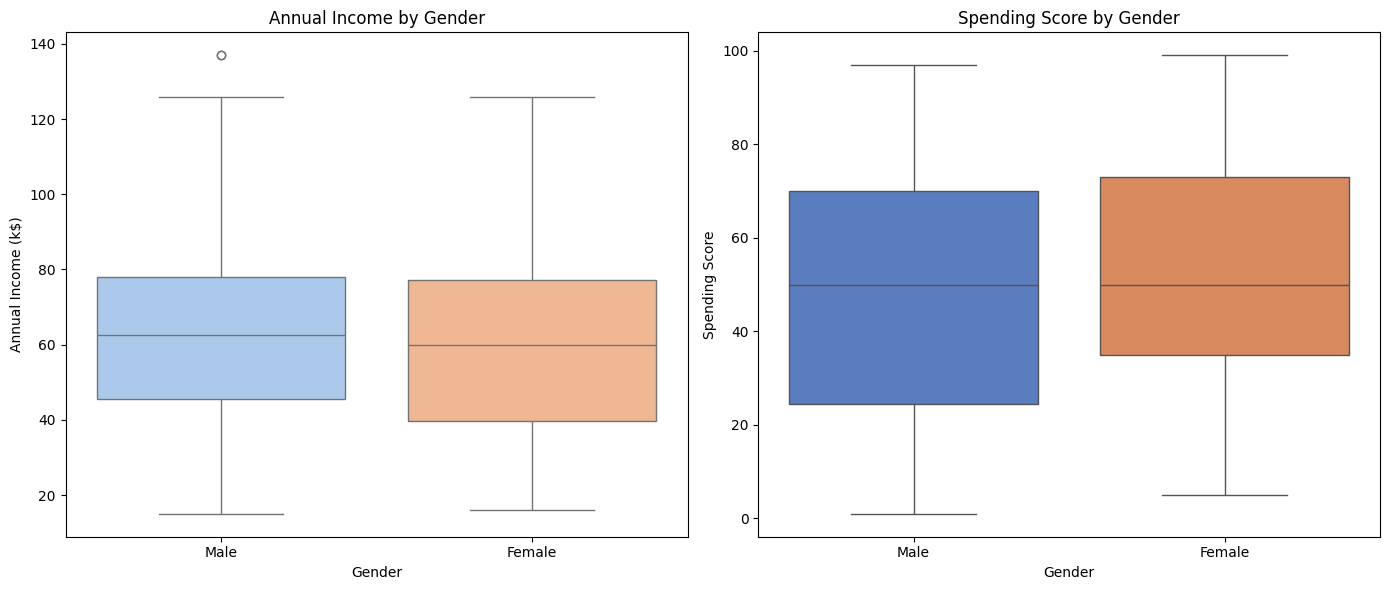

In [49]:
plt.figure(figsize=(14, 6))

#  Income vs Gender
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette='pastel')
plt.title('Annual Income by Gender')
plt.ylabel('Annual Income (k$)')

# Spending Score vs Gender
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='muted')
plt.title('Spending Score by Gender')
plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()


### Scatter plot

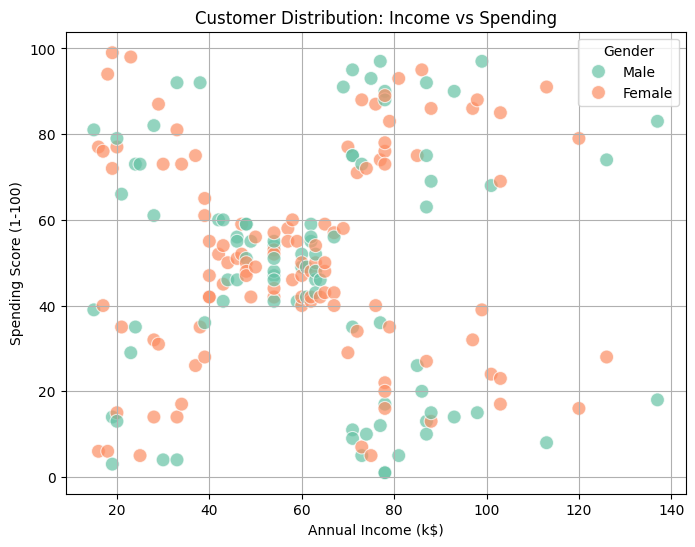

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Gender',
    palette='Set2',
    s=100,
    alpha=0.7
)

plt.title('Customer Distribution: Income vs Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

### Correlation Heatmap

<Figure size 800x500 with 0 Axes>

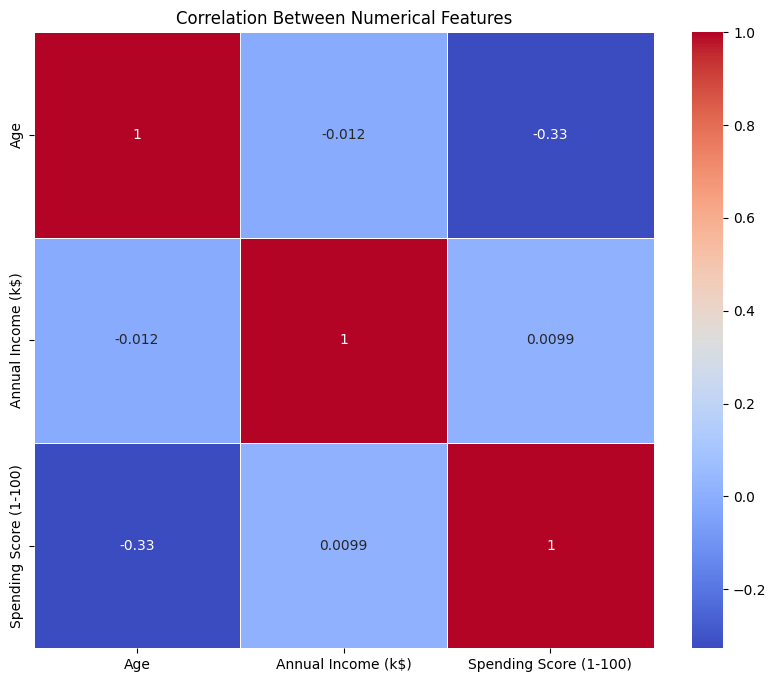

In [51]:
plt.figure(figsize=(8, 5))


numeric_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Numerical Features')
plt.show()


# Scaling the target columns

In [52]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
scaler = StandardScaler()
x = scaler.fit_transform(x)

## Appling K-Means clustering

In [53]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

## Visualize predictions

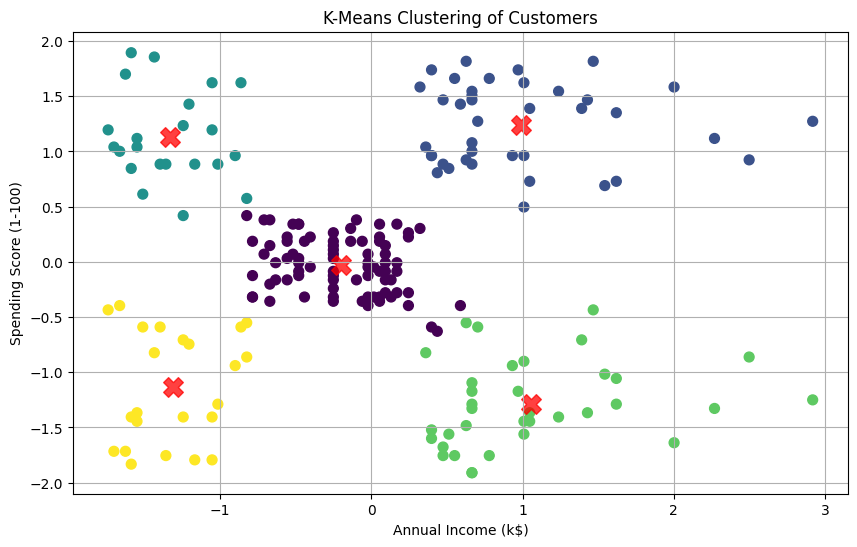

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()




## Appling DBSCAN

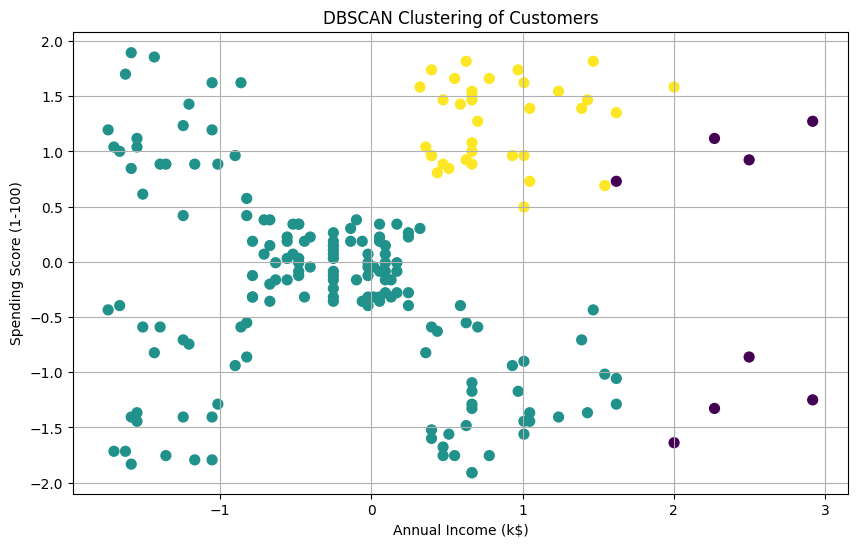

In [55]:
DBSCAN = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = DBSCAN.fit_predict(x)
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=dbscan_labels, s=50, cmap='viridis')
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

### Analyze average spending per cluster

In [56]:
df['Cluster'] = y_kmeans

avg_spending_per_cluster = df.groupby('Cluster')['Spending Score (1-100)'].mean()
print(f"Average Spending Score per Cluster: {avg_spending_per_cluster}")

Average Spending Score per Cluster: Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64
